## Merge the 1D and 2D files that have been spatially aggregated

The processing of 2D and 1D files comes form separate notebooks. These notebooks can append to an existing file, but sometimes we do not want to risk corruption of the existing files. In that case, the 2D and 1D outputs will need to be aggregated as a post-process. This notebook can do that.

In [1]:
import time
import numpy as np
import xarray as xr

tic = time.time()

In [2]:
# Input files
#in_file1 = r'/glade/scratch/ksampson/USGS/CONUS_Water_Budget/Water_Budget/CONUS_HUC12_WB_2D_20091001_20190930.nc'
#in_file2 = r'/glade/scratch/ksampson/USGS/CONUS_Water_Budget/Water_Budget/CONUS_HUC12_WB_1D_20091001_20190930.nc'

# Did not work:
#in_file1 = r'/glade/scratch/ksampson/USGS/CONUS_Water_Budget/Water_Budget/CONUS_HUC12_WB_2D_20191001_20210930.nc'
#in_file2 = r'/glade/scratch/ksampson/USGS/CONUS_Water_Budget/Water_Budget/CONUS_HUC12_WB_1D_20191001_20210930.nc'

# 
#in_file1 = r'/glade/scratch/ksampson/USGS/CONUS_Water_Budget/Water_Budget/CONUS_HUC12_WB_2D_20091001_20210930.nc'
#in_file2 = r'/glade/scratch/ksampson/USGS/CONUS_Water_Budget/Water_Budget/CONUS_HUC12_WB_1D_20091001_20210930.nc'

#
in_file1 = r'/glade/scratch/ksampson/USGS/CONUS_Water_Budget/Water_Budget/CONUS_HUC12_WB_2D_19791001_20220930_2.nc'
in_file2 = r'/glade/scratch/ksampson/USGS/CONUS_Water_Budget/Water_Budget/CONUS_HUC12_WB_1D_19791001_20220930.nc'

# Output file
#out_file = r'/glade/scratch/ksampson/USGS/CONUS_Water_Budget/Water_Budget/CONUS_HUC12_WB_combined_20091001_20190930.nc'
#out_file = r'/glade/scratch/ksampson/USGS/CONUS_Water_Budget/Water_Budget/CONUS_HUC12_WB_combined_20191001_20210930.nc'
#out_file = r'/glade/scratch/ksampson/USGS/CONUS_Water_Budget/Water_Budget/CONUS_HUC12_WB_combined_20091001_20210930.nc'
out_file = r'/glade/scratch/ksampson/USGS/CONUS_Water_Budget/Water_Budget/CONUS_HUC12_WB_combined_19791001_20220930_2.nc'

# Name the zone coordinate that contains the HUC12 IDs
zone_name = 'WBDHU12'

# Name the time coordinate
time_coord = 'time'

In [3]:
ds1 = xr.open_dataset(in_file1)
ds2 = xr.open_dataset(in_file2)

In [4]:
ds1

<xarray.Dataset>
Dimensions:                    (WBDHU12: 86604, time: 516)
Coordinates:
  * WBDHU12                    (WBDHU12) int64 10100020101 ... 181002041600
  * time                       (time) datetime64[ns] 1979-10-01 ... 2022-09-01
Data variables: (12/17)
    total_gridded_area         (WBDHU12) float64 ...
    deltaACCET                 (WBDHU12, time) float32 ...
    deltaACSNOW                (WBDHU12, time) float32 ...
    deltaSNEQV                 (WBDHU12, time) float32 ...
    deltaSOILM                 (WBDHU12, time) float64 ...
    deltaUGDRNOFF              (WBDHU12, time) float32 ...
    ...                         ...
    avgSOILSAT                 (WBDHU12, time) float32 ...
    avgSOILSAT_wltadj_top1     (WBDHU12, time) float32 ...
    totPRECIP                  (WBDHU12, time) float32 ...
    avgT2D                     (WBDHU12, time) float64 ...
    Precip                     (WBDHU12, time) float32 ...
    landmask                   (WBDHU12) float64 ...
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  Landmask : 1=land, 0=water
    sr_x:         1
    sr_y:         1
    stagger:      M

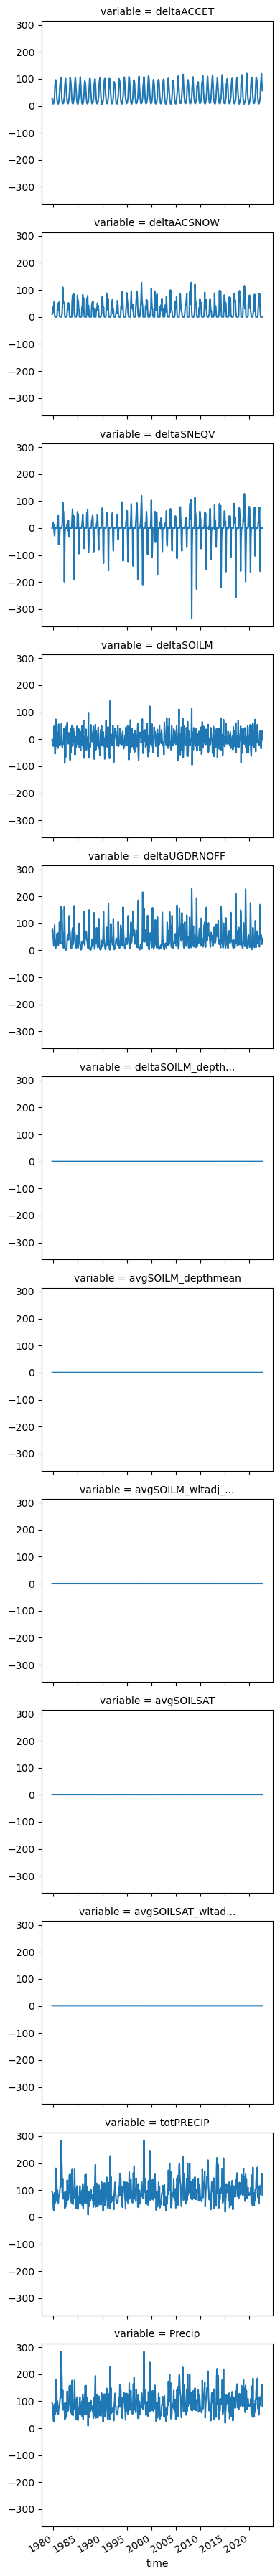

In [5]:
# Plot all variables to see ranges of values
vars_to_plot = [variable for variable in ds1.data_vars if variable not in ['avgT2D', 'avgSOILM', 'avgSNEQV', 'total_gridded_area', 'landmask']] 
ds1[vars_to_plot].isel({zone_name:2}).to_array().plot(row='variable')

In [6]:
ds2

<xarray.Dataset>
Dimensions:           (WBDHU12: 83274, time: 516)
Coordinates:
  * WBDHU12           (WBDHU12) float64 1.01e+10 1.01e+10 ... 1.81e+11 1.81e+11
  * time              (time) datetime64[ns] 1979-10-01 1979-11-01 ... 2022-09-01
Data variables:
    totOutflow        (time, WBDHU12) float64 ...
    Area_sqkm         (WBDHU12) float64 ...
    totInflow         (time, WBDHU12) float64 ...
    deltaDepth        (time, WBDHU12) float64 ...
    avgDepth          (time, WBDHU12) float64 ...
    totqBucket        (time, WBDHU12) float64 ...
    totqSfcLatRunoff  (time, WBDHU12) float64 ...
    totStreamflow     (time, WBDHU12) float64 ...

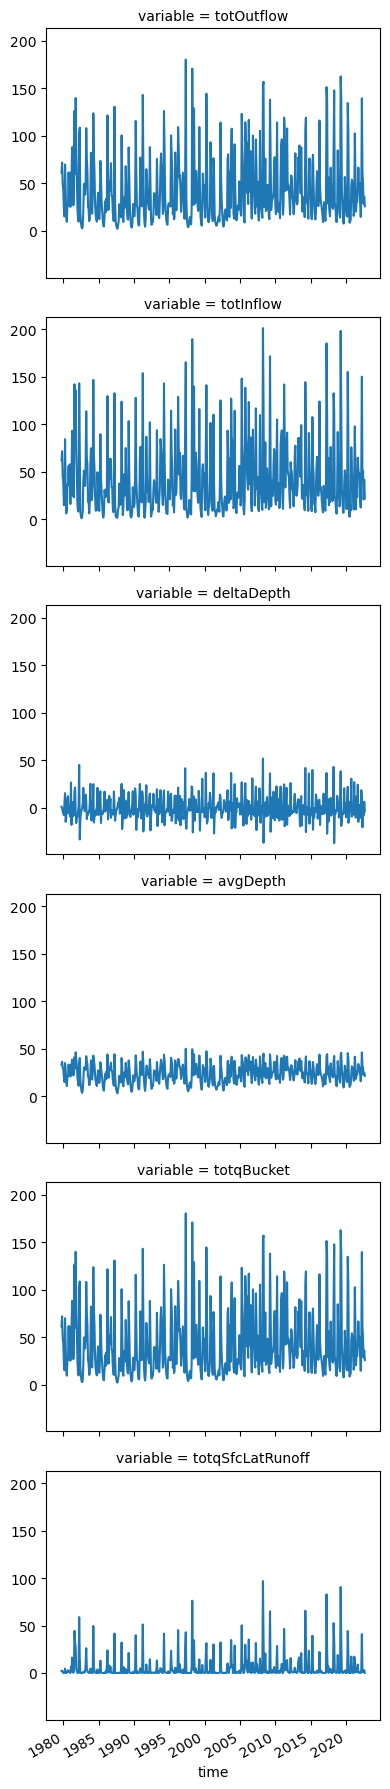

In [7]:
# Plot all variables to see ranges of values
vars_to_plot = [variable for variable in ds2.data_vars if variable not in ['Area_sqkm', 'totStreamflow']] 
ds2[vars_to_plot].isel({zone_name:2}).to_array().plot(row='variable')

In [8]:
# Find values in ds2 not in ds1
import numpy as np
vals_1D_only = ds2[zone_name][~np.in1d(ds2[zone_name], ds1[zone_name])]
print('There are {0} values in ds2 that are not in ds1.'.format(vals_1D_only.shape[0]))
      
vals_2D_only = ds1[zone_name][~np.in1d(ds1[zone_name], ds2[zone_name])]
print('There are {0} values in ds1 that are not in ds2.'.format(vals_2D_only.shape[0]))

There are 13 values in ds2 that are not in ds1.
There are 3343 values in ds1 that are not in ds2.


In [9]:
ds_out = xr.merge([ds1, ds2])
ds_out

<xarray.Dataset>
Dimensions:                    (WBDHU12: 86617, time: 516)
Coordinates:
  * WBDHU12                    (WBDHU12) float64 1.01e+10 1.01e+10 ... 1.81e+11
  * time                       (time) datetime64[ns] 1979-10-01 ... 2022-09-01
Data variables: (12/25)
    total_gridded_area         (WBDHU12) float64 64.0 75.0 67.0 ... 72.0 58.0
    deltaACCET                 (WBDHU12, time) float32 26.78 14.09 ... 21.75
    deltaACSNOW                (WBDHU12, time) float32 10.53 13.13 ... 0.0 0.0
    deltaSNEQV                 (WBDHU12, time) float32 0.0 0.05407 ... 0.0 0.0
    deltaSOILM                 (WBDHU12, time) float64 -2.955 -4.12 ... 3.708
    deltaUGDRNOFF              (WBDHU12, time) float32 54.64 63.61 ... 0.05481
    ...                         ...
    totInflow                  (time, WBDHU12) float64 49.62 62.29 ... 0.02444
    deltaDepth                 (time, WBDHU12) float64 0.5807 ... -0.01593
    avgDepth                   (time, WBDHU12) float64 28.18 33.99 ... 0.733
    totqBucket                 (time, WBDHU12) float64 49.09 64.77 ... 0.03998
    totqSfcLatRunoff           (time, WBDHU12) float64 5.523 5.967 ... 0.003516
    totStreamflow              (time, WBDHU12) float64 369.0 748.5 ... 92.12
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  Landmask : 1=land, 0=water
    sr_x:         1
    sr_y:         1
    stagger:      M

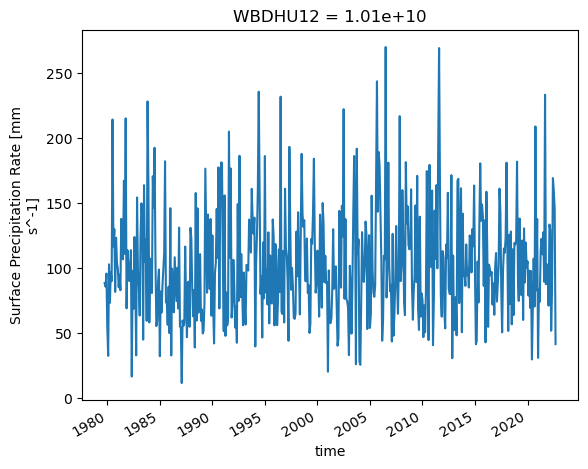

In [10]:
#ds_out.sel({zone_name:vals_1D_only[0]})['totStreamflow'].plot()
ds_out.sel({zone_name:vals_2D_only[0]})['totPRECIP'].plot()

In [11]:
%%time
print('  Writing output to {0}'.format(out_file))
ds_out.to_netcdf(out_file, mode='w', format="NETCDF4", compute=True)

  Writing output to /glade/scratch/ksampson/USGS/CONUS_Water_Budget/Water_Budget/CONUS_HUC12_WB_combined_19791001_20220930_2.nc


<timed exec>:2: SerializationWarning: saving variable WBDHU12 with floating point data as an integer dtype without any _FillValue to use for NaNs


CPU times: user 316 ms, sys: 1.69 s, total: 2.01 s
Wall time: 3.36 s


In [12]:
ds_out.close()

In [13]:
print('Process completed in {0: 3.2f} seconds.'.format(time.time()-tic))

Process completed in  25.29 seconds.
